# Normality test

# 1. Continuous variable

In [17]:
#============================Background Notes==================================#
'''
Normality assumption ensures that the dataset (samples) are withdrawn from 
normally distributed populations.You can check this on a specifc variable 
or more significantly on the distributions of parameters or the 
estimators(βs) of the regression, such as OLS. In this notebook, I illustrate 
how to test Normality at a variable level. I also write the codes for 
Central Limit Theorem (CLT). 
'''

'\nNormality assumption ensures that the dataset (samples) are withdrawn from \nnormally distributed populations.You can check this on a specifc variable \nor more significantly on the distributions of parameters or the \nestimators(βs) of the regression, such as OLS. In this notebook, I illustrate \nhow to test Normality at a variable level. I also write the codes for \nCentral Limit Theorem (CLT). \n'

In [19]:
#============================libraries========================================#
import numpy as np
import pandas as pd
import statsmodels.api as sm
# import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
# from statsmodels.compat import lzip

In [20]:
#=============================loading data from R=============================#
mydata = sm.datasets.get_rdataset("wage2", "wooldridge").data

# '.data' converts our data into a dataframe 
# wage2 is the name of the data
# wooldridge is the R library containing the data

In [21]:
#=========================exploring the data==================================#
# check missing values 
print(mydata.isnull())

#dropping the missing values 
mydata = mydata.dropna()

#displaying data columns 
pd.set_option('display.max_columns', None)
print(mydata.columns.values)
print(type(mydata))
print(mydata.dtypes)
print(mydata.describe())

      wage  hours     IQ    KWW   educ  exper  tenure    age  married  black  \
0    False  False  False  False  False  False   False  False    False  False   
1    False  False  False  False  False  False   False  False    False  False   
2    False  False  False  False  False  False   False  False    False  False   
3    False  False  False  False  False  False   False  False    False  False   
4    False  False  False  False  False  False   False  False    False  False   
..     ...    ...    ...    ...    ...    ...     ...    ...      ...    ...   
930  False  False  False  False  False  False   False  False    False  False   
931  False  False  False  False  False  False   False  False    False  False   
932  False  False  False  False  False  False   False  False    False  False   
933  False  False  False  False  False  False   False  False    False  False   
934  False  False  False  False  False  False   False  False    False  False   

     south  urban   sibs  brthord  medu

In [22]:
#================================CLT=========================================#
# mean
print(mydata.mean())

mean_wage = np.mean(mydata['wage'])
print(mean_wage)

# median 
median_wage = np.median(mydata['wage'])
print(median_wage)

# mode
from scipy import stats

mode_wage = stats.mode(mydata['wage'])
print(mode_wage)

# std dev
std_wage = np.std(mydata['wage'])
print(std_wage)

# variance
var_wage = np.var(mydata['wage'])
print(var_wage)

# percentile
fifty_wage = np.percentile(mydata['wage'], 25)
print(fifty_wage)

wage       988.475113
hours       44.061840
IQ         102.481146
KWW         36.194570
educ        13.680241
exper       11.396682
tenure       7.217195
age         32.983409
married      0.900452
black        0.081448
south        0.322775
urban        0.719457
sibs         2.846154
brthord      2.177979
meduc       10.828054
feduc       10.273002
lwage        6.814297
dtype: float64
988.4751131221719
937.0
ModeResult(mode=array([1000], dtype=int64), count=array([22]))
406.2048264047582
165002.36099451972
699.0


C:\Users\user\AppData\Local\Temp\ipykernel_5188\1148768607.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_wage = stats.mode(mydata['wage'])


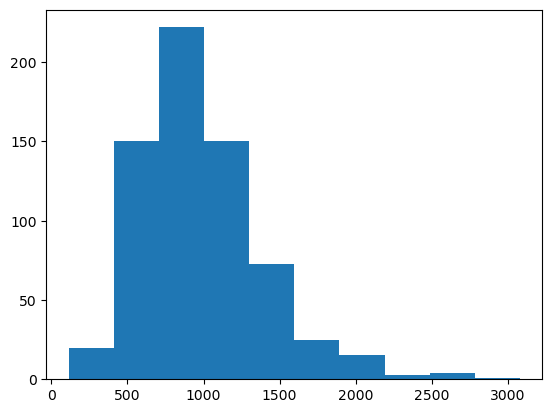

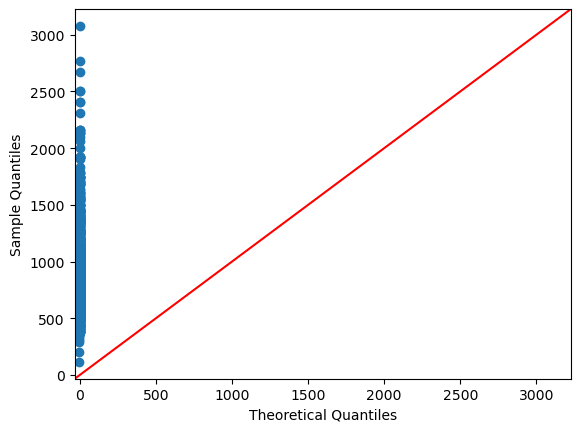

In [23]:
#==============================normality test=================================#
#==============================data visualization=============================#
# 1. plots 
# histogram 
plt.hist(mydata['wage'])
plt.show()

'''
OR
mydata.hist('wage')
'''
# qqplot
sm.qqplot(mydata['wage'], line = '45')
plt.show()

In [24]:
#========================probability distribution test========================#
# 2. skewness and kurtosis on wage
from scipy.stats import skew, kurtosis

# skewness
skew_wage = skew(mydata['wage'], bias = False)
print(skew_wage)

# kurtosis
kurto_wage = kurtosis(mydata['wage'], bias = False)
print(kurto_wage)

1.1548992964409004
2.4388815210738937


In [25]:
#===================statistical tests for normality===========================#
# 3. Shapiro-Wilks normality test

from scipy.stats import shapiro, anderson, kstest

shapiro_wage = shapiro(mydata['wage'])
print(shapiro_wage)

# 4. Anderson-Darling normality test 
anderson_wage = anderson(mydata['wage'])
print(anderson_wage)

# 5. Kolmogorov-Smirnov Test
kolmogrov_wage = kstest(mydata['wage'], 'norm')
print(kolmogrov_wage)

# What is your conclusion on normality test for wage variable?
#================================END==========================================#

ShapiroResult(statistic=0.9380210041999817, pvalue=5.576400115392508e-16)
AndersonResult(statistic=7.319449935054081, critical_values=array([0.573, 0.652, 0.782, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=1.0, pvalue=0.0)


# 2. Dummy variable

In [26]:
#====================================CLT======================================# 
#checking for dychotomous/ dummy/ binary variables 
dummy_var = mydata.T[mydata.isin([0,1]).all()].T
print(dummy_var)

# checking counts of a dummy/ binary variable
count_urban = mydata['urban'].value_counts()
print(count_urban)

 # mean for urban 
urban_means = mydata.groupby(['urban']).mean()
print(urban_means)

# std dev for urban 
urban_stds = mydata.groupby(['urban']).std()
print(urban_stds)

# variance for urban 
urban_vars = mydata.groupby(['urban']).var()
print(urban_vars)

     married  black  south  urban
0        1.0    0.0    0.0    1.0
2        1.0    0.0    0.0    1.0
3        1.0    0.0    0.0    1.0
4        1.0    0.0    0.0    1.0
6        0.0    0.0    0.0    1.0
..       ...    ...    ...    ...
924      1.0    0.0    1.0    1.0
925      1.0    0.0    1.0    0.0
928      1.0    0.0    1.0    0.0
929      1.0    1.0    1.0    1.0
931      1.0    0.0    1.0    1.0

[663 rows x 4 columns]
1    477
0    186
Name: urban, dtype: int64
              wage      hours          IQ        KWW       educ      exper  \
urban                                                                        
0       838.602151  43.720430  101.177419  34.865591  13.322581  11.655914   
1      1046.916143  44.194969  102.989518  36.712788  13.819706  11.295597   

         tenure        age   married     black     south      sibs   brthord  \
urban                                                                          
0      7.467742  33.037634  0.919355  0.048387  0.4

In [27]:
#=============selecting the central tendency for wage-urban variable==========#
print(urban_means['wage'])
print(urban_stds['wage'])
print(urban_vars['wage'])

urban
0     838.602151
1    1046.916143
Name: wage, dtype: float64
urban
0    356.737170
1    410.078304
Name: wage, dtype: float64
urban
0    127261.408428
1    168164.215642
Name: wage, dtype: float64


In [28]:
#=============================cbinding the 3==================================#
wage_combination = pd.concat([urban_means['wage'], urban_stds['wage'],\
                         urban_vars['wage']], axis=1)
print(wage_combination)

              wage        wage           wage
urban                                        
0       838.602151  356.737170  127261.408428
1      1046.916143  410.078304  168164.215642


In [29]:
# urban workers; urban = 1
wage_urban_select = mydata[['urban','wage']].dropna()
wage_urban = wage_urban_select[wage_urban_select.urban == 1]
print(wage_urban)

# means of wages for urban workers
print(wage_urban.mean())

# rural workers; urban = 0
wage_rural_select = mydata[['urban','wage']].dropna()
wage_rural = wage_rural_select[wage_rural_select.urban == 0]
print(wage_rural)

# means of wages for rural workers
print(wage_rural.mean())

     urban  wage
0        1   769
2        1   825
3        1   650
4        1   562
6        1   600
..     ...   ...
915      1   600
919      1  1562
924      1  1442
929      1   664
931      1  1202

[477 rows x 2 columns]
urban       1.000000
wage     1046.916143
dtype: float64
     urban  wage
8        0  1154
10       0   930
33       0   666
39       0  1081
56       0   875
..     ...   ...
920      0   357
922      0   566
923      0   481
925      0   645
928      0   477

[186 rows x 2 columns]
urban      0.000000
wage     838.602151
dtype: float64


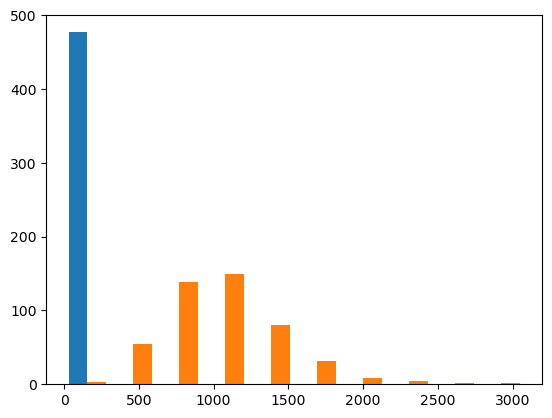

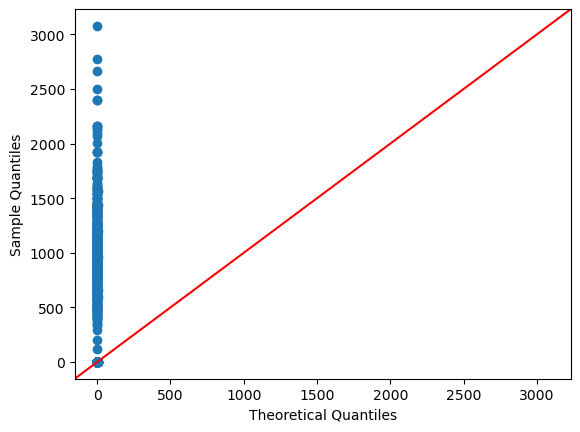

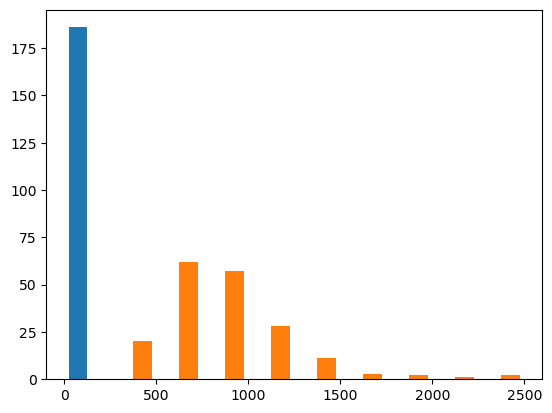

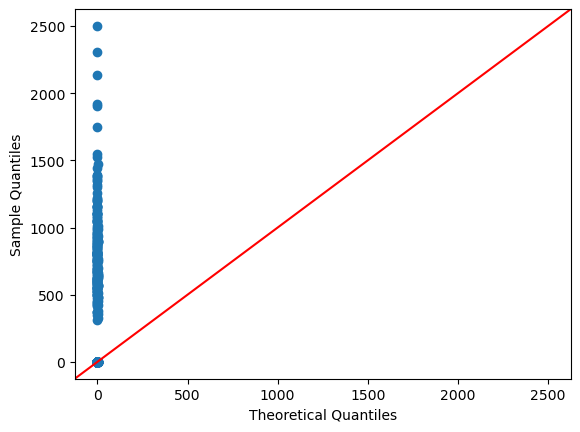

In [30]:
#==============================normality test=================================#
#==============================data visualization=============================#
# 1. plots 
# a. wage_urban 
#histogram
plt.hist(wage_urban)
plt.show()

# qqplot
sm.qqplot(wage_urban, line = '45')
plt.show()

# b. wage_rural 
#histogram
plt.hist(wage_rural)
plt.show()

# qqplot
sm.qqplot(wage_rural, line = '45')
plt.show()

In [31]:
#========================probability distribution test========================#
# 2. skewness and kurtosis on wage for dummy variable
# a. wage_urban
# skewness
skew_wage_urban = skew(wage_urban, bias = False)
print(skew_wage_urban[1])

# kurtosis
kurto_wage_urban = kurtosis(wage_urban, bias = False)
print(kurto_wage_urban[1])

# b. wage_rural
# skewness
skew_wage_rural = skew(wage_rural, bias = False)
print(skew_wage_rural[1])

# kurtosis
kurto_wage_rural = kurtosis(wage_rural, bias = False)
print(kurto_wage_rural[1])

1.0607799705841392
2.3813555481436524
1.638420431398509
4.2047170052917044


C:\Users\user\AppData\Local\Temp\ipykernel_5188\3449969097.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_wage_urban = skew(wage_urban, bias = False)
C:\Users\user\AppData\Local\Temp\ipykernel_5188\3449969097.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurto_wage_urban = kurtosis(wage_urban, bias = False)


In [32]:
#===================statistical tests for normality===========================#
# 3. Shapiro-Wilks normality test
# a. wage_urban
shapiro_wage_urban = shapiro(wage_urban)
print(shapiro_wage_urban)

# b. wage_rural
shapiro_wage_rural = shapiro(wage_rural)
print(shapiro_wage_rural)

# What is your conclusion for the normality test above? 

#===================================END=======================================#

ShapiroResult(statistic=0.814134418964386, pvalue=9.16374841345952e-32)
ShapiroResult(statistic=0.8102952241897583, pvalue=1.3990113778045027e-20)
